In [175]:
import math
from pyrt.math import *
from pyrt.scene import *
from pyrt.geometry import Triangle, Vertex, Sphere
from pyrt.camera import PerspectiveCamera
from pyrt.renderer import SimpleRT
from pyrt.material import PhongMaterial
from pyrt.light import PointLight

In [176]:
class FlatTriangle(Triangle):
    def __init__(self, *args, **kwargs):
        super(FlatTriangle, self).__init__(*args, **kwargs)
        self.update_normal()
    
    def update_normal(self):
        v1 = self.b.position - self.a.position
        v2 = self.c.position - self.a.position
        crossprod = cross3(v1, v2)
        norm = normalize(crossprod)
        
        self.a.normal = norm
        self.b.normal = norm
        self.c.normal = norm
        

In [205]:
w = int(320*2)
h = int(240*2)

camera = PerspectiveCamera(w, h, 60)
camera.setView(Vec3(-5,-5,8), Vec3(0.5,0.5,3), Vec3(0,0,1))

In [206]:
scene = Scene()
scene.addLight(PointLight(Vec3(5,-5,3)))

scene.add(Sphere(center=Vec3(0.,0.,1.), radius=0.2, material=PhongMaterial(color=Vec3(1.,0.,0.))))
scene.add(Sphere(center=Vec3(1.,0.,1.), radius=0.2, material=PhongMaterial(color=Vec3(0.,1.,0.))))
scene.add(Sphere(center=Vec3(0.,1.,1.), radius=0.2, material=PhongMaterial(color=Vec3(0.,0.,1.))))

def h_func(x,y):
    if (x <= 1 or y <= 1) or (y > 5 and y < 8) or (x > 3 and x < 7):
        return 0
    return (math.sin(x/3.142)*5 + math.sin(y/3.142)*5) / 2

skip = 1
for y in range(0, 10, skip):
    for x in range (0, 10, skip):
        v1 = Vertex(position=(x, y, h_func(x, y)))
        v2 = Vertex(position=(x+skip, y, h_func(x+skip, y)))
        v3 = Vertex(position=(x+skip, y+skip, h_func(x+skip, y+skip)))
        v4 = Vertex(position=(x, y+skip, h_func(x, y+skip)))
        
        scene.add(FlatTriangle(v1, v2, v4))
        scene.add(FlatTriangle(v4, v2, v3))


In [207]:
scene.setCamera(camera)

In [208]:
engine = SimpleRT(shadow=True, iterations=6)

# Creating Renderer: Simple Raytracer
# Shadow Enabled
# Iterations: 6


# RENDER STATISTICS###############################
TIME FOR RENDERING: 454.6890821456909s
NUMBER OF PRIMARY RAYS: 307200
NUMBER OF SECONDARY RAYS: 0
NUMBER OF SHADOW RAYS: 52619
RAYS/s: 791.3517481044491
##################################################



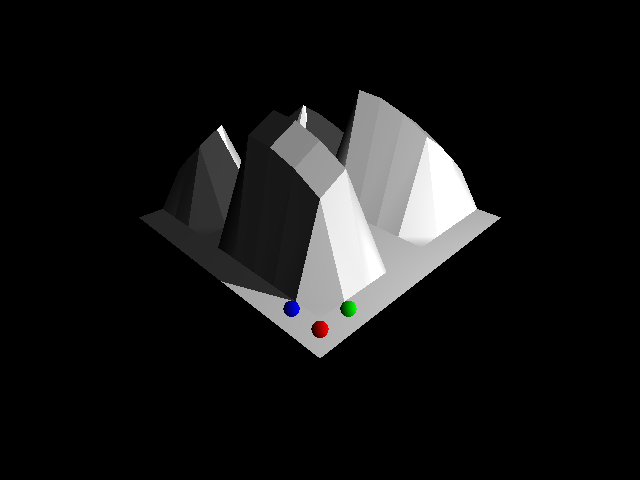

In [209]:
image = engine.render(scene)
image.display()